# End to end ML


user needs are already cleared.A predictor of client susceptibility to asign a loan

In [1]:
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df_analytics = pd.read_csv('Data/analitycs/heart_disease_cleaned_2.csv')

## EDA

In [3]:
df_analytics.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,0,52,1,0.0,125,212.0,0,1.0,168,0,2,2,3,0
1,1,53,1,0.0,140,203.0,1,0.0,155,1,0,0,3,0
2,2,70,1,0.0,145,174.0,0,1.0,125,1,0,0,3,0
3,3,61,1,0.0,148,203.0,0,1.0,161,0,2,1,3,0
4,4,62,0,0.0,138,294.0,1,1.0,106,0,1,3,2,0


In [4]:
df_analytics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  438 non-null    int64  
 1   age         438 non-null    int64  
 2   sex         438 non-null    int64  
 3   cp          438 non-null    float64
 4   trestbps    438 non-null    int64  
 5   chol        438 non-null    float64
 6   fbs         438 non-null    int64  
 7   restecg     438 non-null    float64
 8   thalach     438 non-null    int64  
 9   exang       438 non-null    int64  
 10  slope       438 non-null    int64  
 11  ca          438 non-null    int64  
 12  thal        438 non-null    int64  
 13  target      438 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 48.0 KB


In [6]:
df_analytics.describe()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,345.691781,54.488584,0.680365,0.966581,131.810502,246.974293,0.143836,0.543147,148.390411,0.356164,1.353881,0.684932,2.319635,0.525114
std,266.589836,8.983769,0.466868,0.985670,17.429772,48.287605,0.351324,0.510231,23.329509,0.479412,0.620306,0.978628,0.622336,0.499940
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123.250000,48.000000,0.000000,0.000000,120.000000,214.000000,0.000000,0.000000,132.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,287.500000,56.000000,1.000000,0.966581,130.000000,246.974293,0.000000,0.543147,152.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,529.500000,61.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,165.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1015.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# class imbalance check
df_analytics['target'].value_counts(normalize = True)

target
1    0.525114
0    0.474886
Name: proportion, dtype: float64

## Data preparation
Null values can break models

In [ ]:
#count missing values
print(df_stage['Cuotas en mora'].isnull().sum())

0


In [ ]:
# drop empty columns and rows
columns_dropped = df_stage.drop(['column_name'] , axis= 'columns')
r_and_c_dropped = columns_dropped.dropna(how='all')


### Imputation

In [ ]:
mean_value = df_stage['column_name'].mean()
df_stage['column_name'].fillna(mean_value, inplace=True)


In [ ]:
from sklearn.impute import KNNImputer

#initialize imputer
imputer =KNNImputer(n_neighbors= X, weights="uniform")

df_imputed['column_name'] = imputer.fit_transform(df_stage['column_name'])

#check na values
heart_disease_duplicates_dropped['restecg'].isna().any()
 

### Duplicates

In [ ]:
df_stage_duplicated_dropped = columns_dropped.drop_duplicates()

## Feature engineering and selection
Enhance the performance of ML models. Easier deployment and maintenance. Faster training, interpretability gain and sometimes improved performance. 

### model splitting

In [7]:
# split data
X_train, X_test = train_test_split(df_analytics,test_size=0.2,random_state=42)

In [8]:
X_train.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
265,373,58,1,1.000000,120,284.0,0,0.000000,160,0,1,0,2,0
406,806,57,1,0.966581,150,276.0,0,0.000000,112,1,1,1,1,0
31,31,50,0,1.000000,120,244.0,0,0.543147,162,0,2,0,2,1
84,94,62,1,1.000000,128,208.0,1,0.000000,140,0,2,0,2,1
378,681,59,1,0.966581,170,326.0,0,0.000000,140,1,0,0,3,0


### Normalization 
Scales numeric features to a scale of 0 to 1, ensuring that no particular feature can dominate the model due to its scale. This is beneficial when features have different ranges and you use algorithms sensitive to the inputs' scale like K-Nearest Neighbors (KNN) or Neural Networks.

In [9]:
#Create normalizer object , fit on training data, normalize and transform test set
norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)


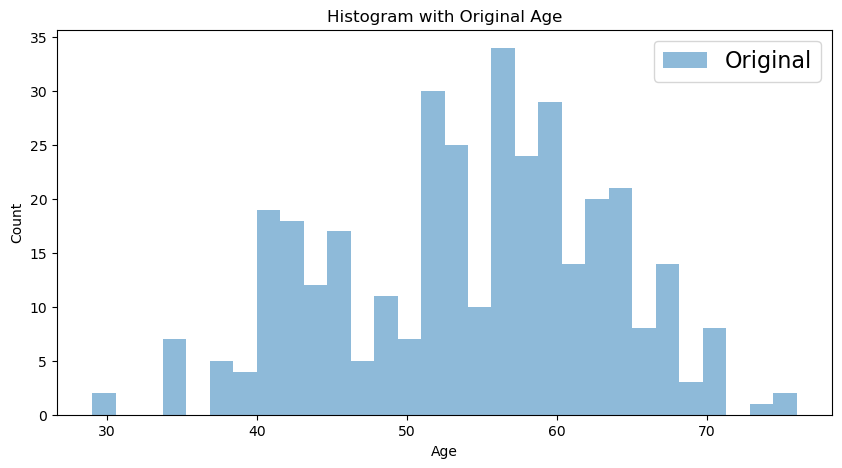

In [16]:
# Show the initial distribution of 'age'
age = X_train['age']
plt.figure(figsize=(10,5))
plt.hist(age, bins=30, alpha=0.5, label='Original')
plt.legend(prop={'size': 16})
plt.title('Histogram with Original Age'); 
plt.xlabel('Age'); plt.ylabel('Count');
plt.show()

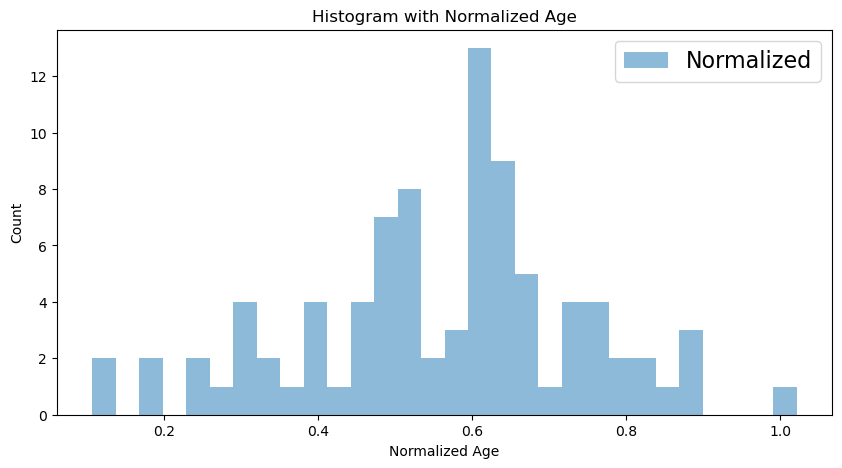

In [17]:
# Normalize 'age' on the training set.
normalizer = MinMaxScaler()
X_train['age'] = normalizer.fit_transform(X_train['age'].values.reshape(-1,1))

# Use the same normalizer to transform the 'age' column of the test set to avoid data leakage
X_test['age'] = normalizer.transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_test['age'], bins=30, alpha=0.5, label='Normalized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Normalized Age')
plt.xlabel('Normalized Age')
plt.ylabel('Count')
plt.show()

### Standarization
Standardization scales features to have a mean of zero and a variance of one. Standardization benefits algorithms that assume features are centered around zero and have variance in the same order, like in Support Vector Machines (SVMs) and Linear Regression

In [18]:
sc = StandardScaler()
X_train_stzd = sc.fit_transform(X_train)

# Only standarize the test data
X_test_stdz = sc.transform(X_test)


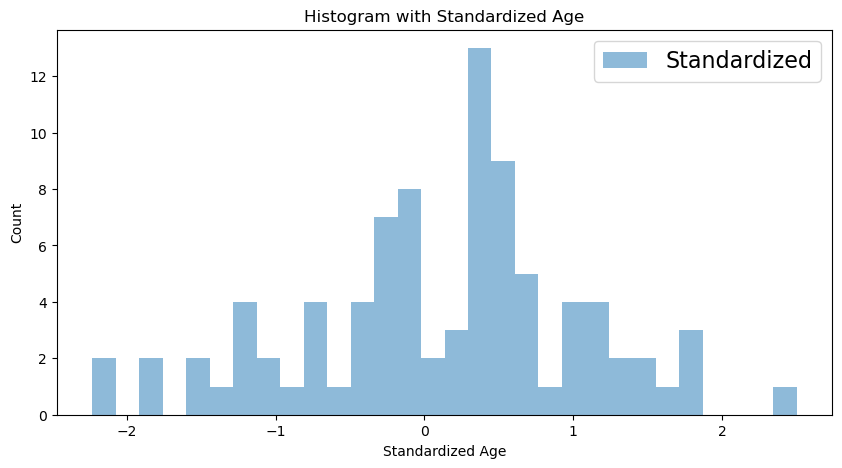

In [19]:
# Standardize 'age' on the training set and use the same standardizer to transform the 'age' column of the test set to avoid data leakage
standardizer = StandardScaler()
X_train['age'] = standardizer.fit_transform(X_train['age'].values.reshape(-1,1))
X_test['age'] = standardizer.transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_test['age'], bins=30, alpha=0.5, label='Standardized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Standardized Age')
plt.xlabel('Standardized Age')
plt.ylabel('Count')
plt.show()

What constitutes a good feature?    

A good feature is one that is relevant and informative for the problem at hand. It should have a strong correlation with the target variable and be able to differentiate between different classes or groups. It should also be easily interpretable and understandable. Additionally, a good feature should be robust and not affected by outliers or missing values. It should also be scalable and able to handle a large amount of data. Finally, a good feature should be independent and not highly correlated with other features, as this can lead to multicollinearity and affect the performance of the model. 
In order to improve our prediction accuracy, we need to use relevant features for modeling. It also doesn't help to use multiple features which represent similar metrics. In this way, we can visualize dissimilar features as being perpendicular, or orthogonal to each other

### Sklearn future selection

A popular feature selection tool is sklearn's feature_selection. Feature_selection offers a robust toolbox that helps select significant, non-redundant features in our dataset.

We can use a Random Forest classifier as the underlying model to estimate the importance of each feature. The Random Forest model eliminates features considered irrelevant until it can no longer improve its target variable predictions. Prefit equals true tells SelectFromModel that the model has already been fitted. When constructing our Random Forest classifier, the parameters n_jobs equals -1 allows us to use all available processors on our machine, class_weight balances class frequencies, and max_depth limits the tree's depth to five. We use the dot-fit function to get critical features. In this scenario, heart_disease_x represents our features, while heart_disease_y signifies our target. Both need to be provided because the Random Forest classifier calculates feature importance based on the capability of the features x to predict the target y. The model-dot-get_support function returns a Boolean array that indicates which features are considered essential and which are not.

#### Train and test dataset definition

In [20]:
# define dataframes for train and test
heart_disease_df_X =pd.DataFrame(df_analytics.drop('target',axis=1))
heart_disease_df_y = pd.DataFrame(df_analytics['target'])

#spliting data between train and test before train to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
            heart_disease_df_X,heart_disease_df_y  ,test_size=0.2,random_state=42)



#### Feature selection using random forest classifier

c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original features: Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'slope', 'ca', 'thal'],
      dtype='object')

Selected features: Index(['cp', 'thalach', 'slope', 'ca', 'thal'], dtype='object')


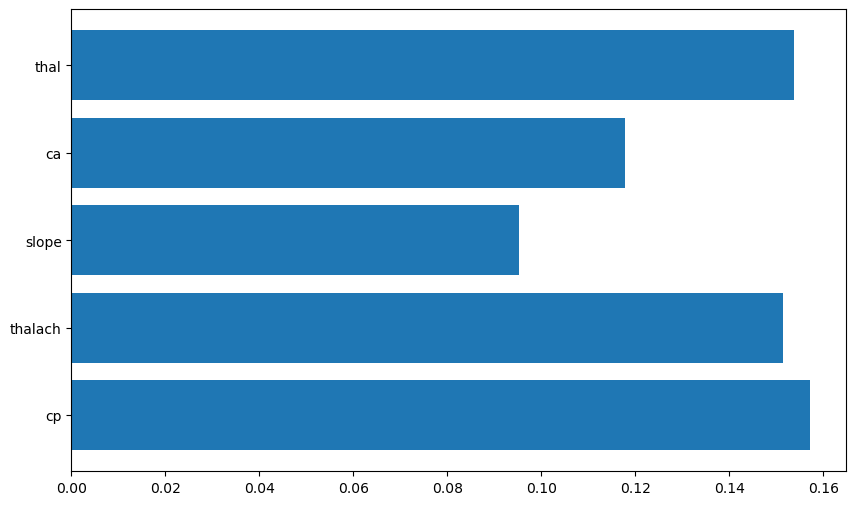

In [22]:
# Define the random forest model and fit to the training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

# Define the feature selection object
model = SelectFromModel(rf, prefit=True)

# Transform the training features
X_train_transformed = model.transform(X_train)

original_features = df_analytics.columns[:-1]
print(f"Original features: {original_features}")

# Select the features deemed important by the SelectFromModel
features_bool = model.get_support()

selected_features = original_features[features_bool]
print(f"\nSelected features: {selected_features}")

feature_importance = pd.DataFrame({
    "feature": selected_features,
    "importance": rf.feature_importances_[features_bool]
})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"], feature_importance["importance"])
plt.show()

## Model training
At the core of model training lies an essential concept: Occam's Razor. This principle suggests that the simplest explanation or model that fits the data is usually best. Because of this, when selecting our models, we should lean towards simple models that provide a good fit to our data.
For our problem, we might select a binary classifier model such as logistic regression. This model finds a decision boundary to separate classes; in our case, the patients with a positive or negative diagnosis. A similar model is a support vector classifier or SVC. Another great model is a decision tree, which learns rules to categorize data, and we can also use a random forest model to base predictions on the diagnoses of many decision tree models.
- sklearn.linear_model.LogisticRegression
- sklearn.svm.SVC
- sklearn.tree.DecisionTreeClassifier
- sklearn.ensemble.RandomForestClassifier

![alt text](image.png)

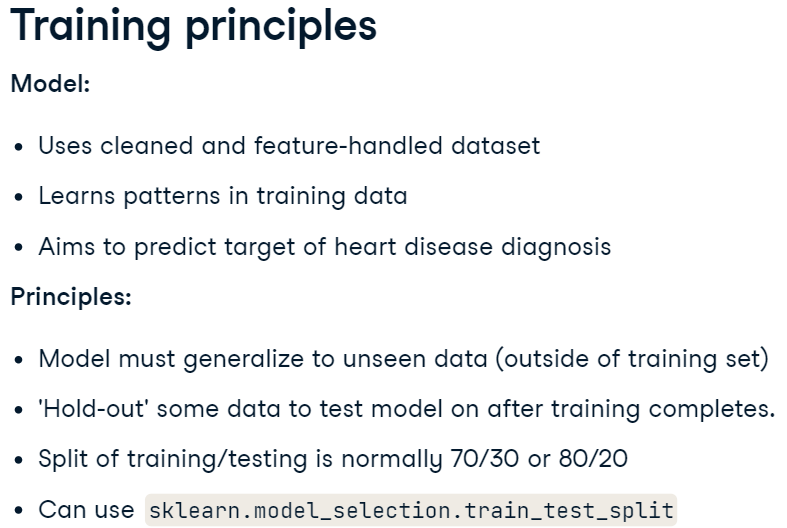

Sometimes, we can also employ a third hold-out dataset, often called a 'validation set'. This set is used during model development to fine-tune model parameters and select the best-performing model

### Logistic regresion.Model definition and training. 

In [23]:
# Define the model
logistic_model = LogisticRegression(max_iter = 200)

#train the model 
logistic_model.fit(X_train, y_train)

#predict the test data
y_pred = logistic_model.predict(X_test)

#calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 82.95%


c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model predictions

#### Patient selection

In [47]:
#select a patient from df_analytics
jane_doe_data = df_analytics.drop('target', axis=1).iloc[1]
jane_doe_data = jane_doe_data.values.reshape(1, -1)

In [40]:
#Predict Jane heart disease diagnostics probability
jane_doe_data_probabilities = logistic_model.predict_proba(jane_doe_data)
jane_doe_data_prediction = logistic_model.predict(jane_doe_data)

#Print the probability of Jane having heart disease
print("Jane Doe's Heart Disease Probability: {}".format(jane_doe_data_probabilities[0]))
print("Jane Doe's predicted health condition: {}".format(jane_doe_data_prediction[0]))


Jane Doe's Heart Disease Probability: [0.93020859 0.06979141]
Jane Doe's predicted health condition: 0


c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### SVC.Model definition and training

In [44]:
#Import required modules. Support vector classifier Model 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(heart_disease_df_X, heart_disease_df_y, test_size= 0.2 , random_state=42)

#Define the SVC model
svc_model = SVC(kernel='linear',probability=True)

# Fit the model to the training data
svc_model.fit(X_train, y_train)

c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', probability=True)

### Model predictions

In [45]:
#get predictions
y_pred = svc_model.predict(X_test)

# Calculate the accuracy
accuracy = svc_model.score(X_test, y_test)
print("Accuracy:", accuracy*100, "%")
print(y_pred)

Accuracy: 82.95454545454545 %
[0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0
 1 1 1 0 0 1 0 1 0 1 0 1 0 0]


In [48]:
#Predict Jane heart disease diagnostics probability
jane_doe_data_probabilities = svc_model.predict_proba(jane_doe_data)
jane_doe_data_prediction = svc_model.predict(jane_doe_data)

#Print the probability of Jane having heart disease
print("Jane Doe's Heart Disease Probability: {}".format(jane_doe_data_probabilities[0]))
print("Jane Doe's predicted health condition: {}".format(jane_doe_data_prediction[0]))

Jane Doe's Heart Disease Probability: [0.8963473 0.1036527]
Jane Doe's predicted health condition: 0


c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
